# Quickview Notebook

Welcome! This IPython notebook provides a quick look at short segments of data from the <a href='https://gwosc.org/'>Gravitational Wave Open Science Center</a>

* Set the GPS time (t0) and detector in the first cell
* Click "Run All" in the cell menu at the top
* Your plots will appear below

v0.10; December 2024

## Set Parameters

* [GPS time](https://gwosc.org/gps) of the data of interest ([Learn more](https://www.google.com/search?q=What+is+gps+time))
* Detector could be H1 (LIGO Hanford), L1 (LIGO Livingston), or V1 (Virgo)

In [15]:
# -- Set a GPS time:
t0 = 1126259462.4    # -- GW150914

#-- Choose detector as H1, L1, or V1
detector = 'H1'

You might try some of these examples times in the H1 detector:
<pre>
t0 = 1126259462.4    # -- GW150914
t0 = 1187008882.4    # -- GW170817
t0 = 933200215       # -- Loud hardware injection
t0 = 1132401286.33   # -- Koi Fish Glitch
</pre>

### Import some packages

In [16]:
import requests, os
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

try:
    from gwpy.timeseries import TimeSeries
except:
    ! pip install -q "gwpy==3.0.9"
    ! pip install -q "matplotlib==3.7.3"
    ! pip install -q "astropy==6.1.4"
    from gwpy.timeseries import TimeSeries  

# -- Turn on interactive plotting
plt.ion()

### Query and download data

In [17]:
center = int(t0)  #-- Round GPS time to nearest second
strain = TimeSeries.fetch_open_data(detector, center-16, center+16)

### Plot the raw time-series data

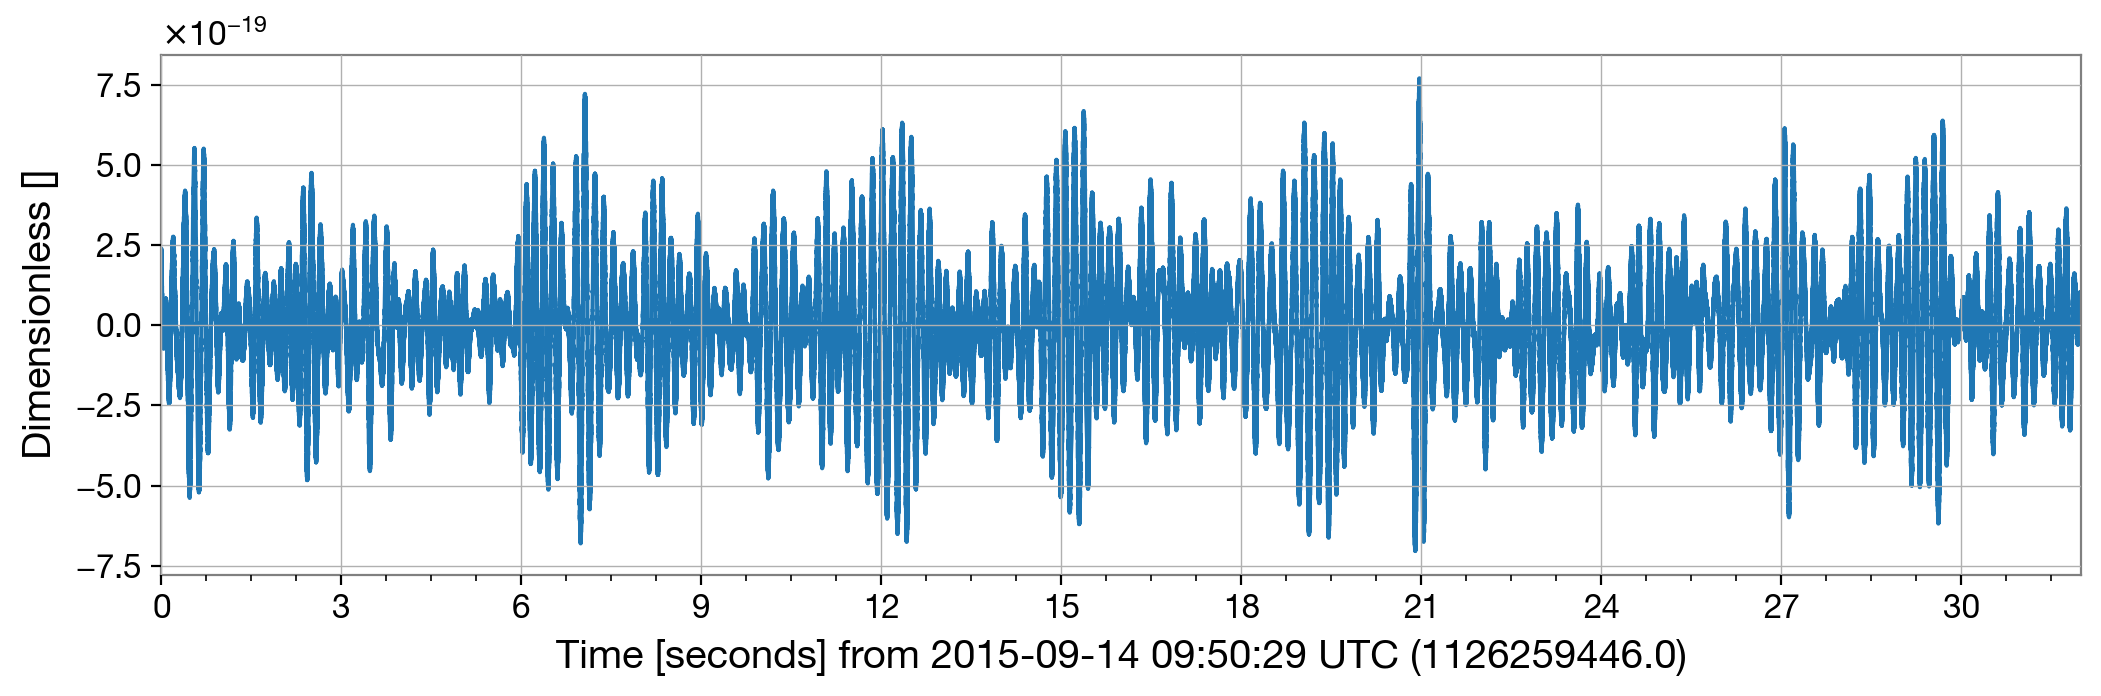

In [18]:
fig1 = strain.plot()

### Plot the Amplitude Spectral Density (ASD)

The amplitude spectral density is one way to visualize the frequency-domain content of a time series signal.
 * [ASDs in the gwpy documentation](https://gwpy.github.io/docs/stable/signal/)
 * [ASDs in Wikipedia](https://en.wikipedia.org/wiki/Spectral_density)
 * [ASDs in the Frequency Domain Data video](https://labcit.ligo.caltech.edu/~jkanner/gwosc/intro-course/)

(1e-24, 1e-19)

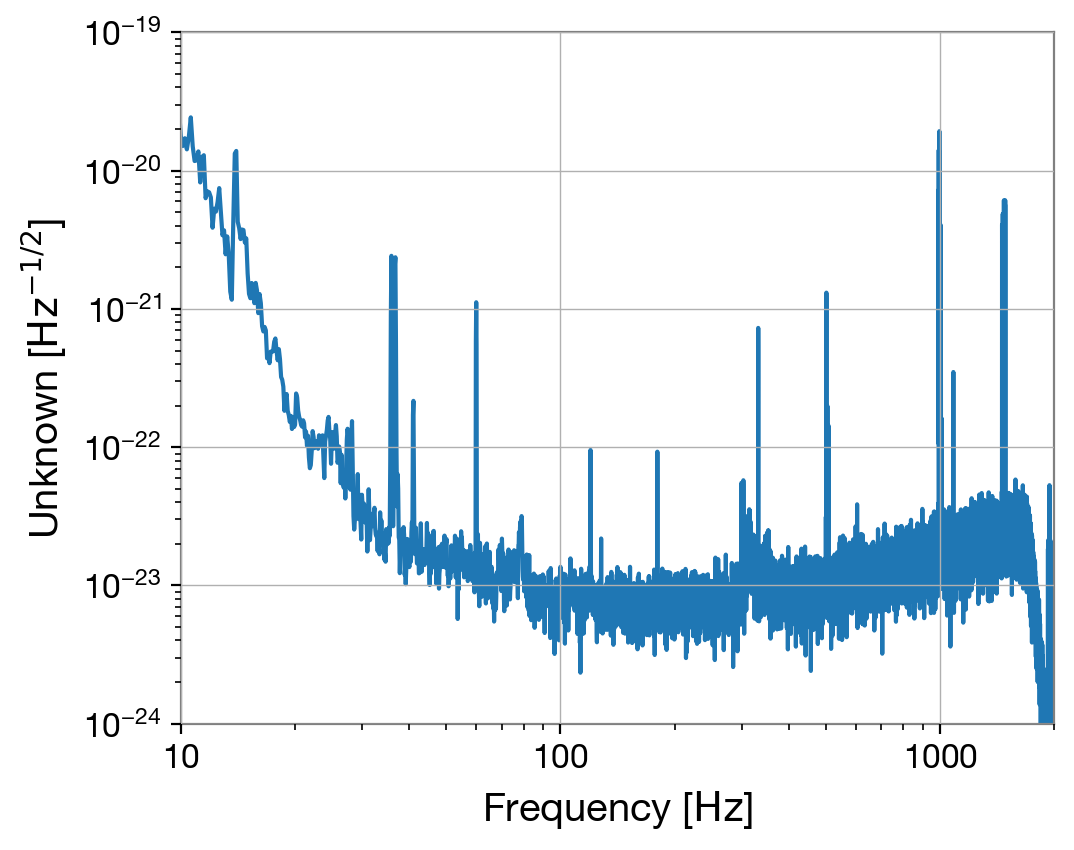

In [19]:
# -- Plot ASD
fig2 = strain.asd(fftlength=8).plot()
plt.xlim(10,2000)
plt.ylim(1e-24, 1e-19)

### Whiten and band-pass the data

* Whitening is a process that re-weights a signal, so that all frequency bins have a nearly equal amount of noise.
* A band-pass filter uses both a low frequency cutoff and a high frequency cutoff, and only passes signals in the frequency band between these values.

See also:

 * [Whitening a TimeSeries](https://gwpy.github.io/docs/stable/examples/timeseries/whiten/#whitening-a-timeseries)
 * [Signal Processing Tutorial](https://gwfilter.streamlit.app)
 * [Finding Signals in Noise video](https://labcit.ligo.caltech.edu/~jkanner/gwosc/intro-course/)


(1126259462.2, 1126259462.5)

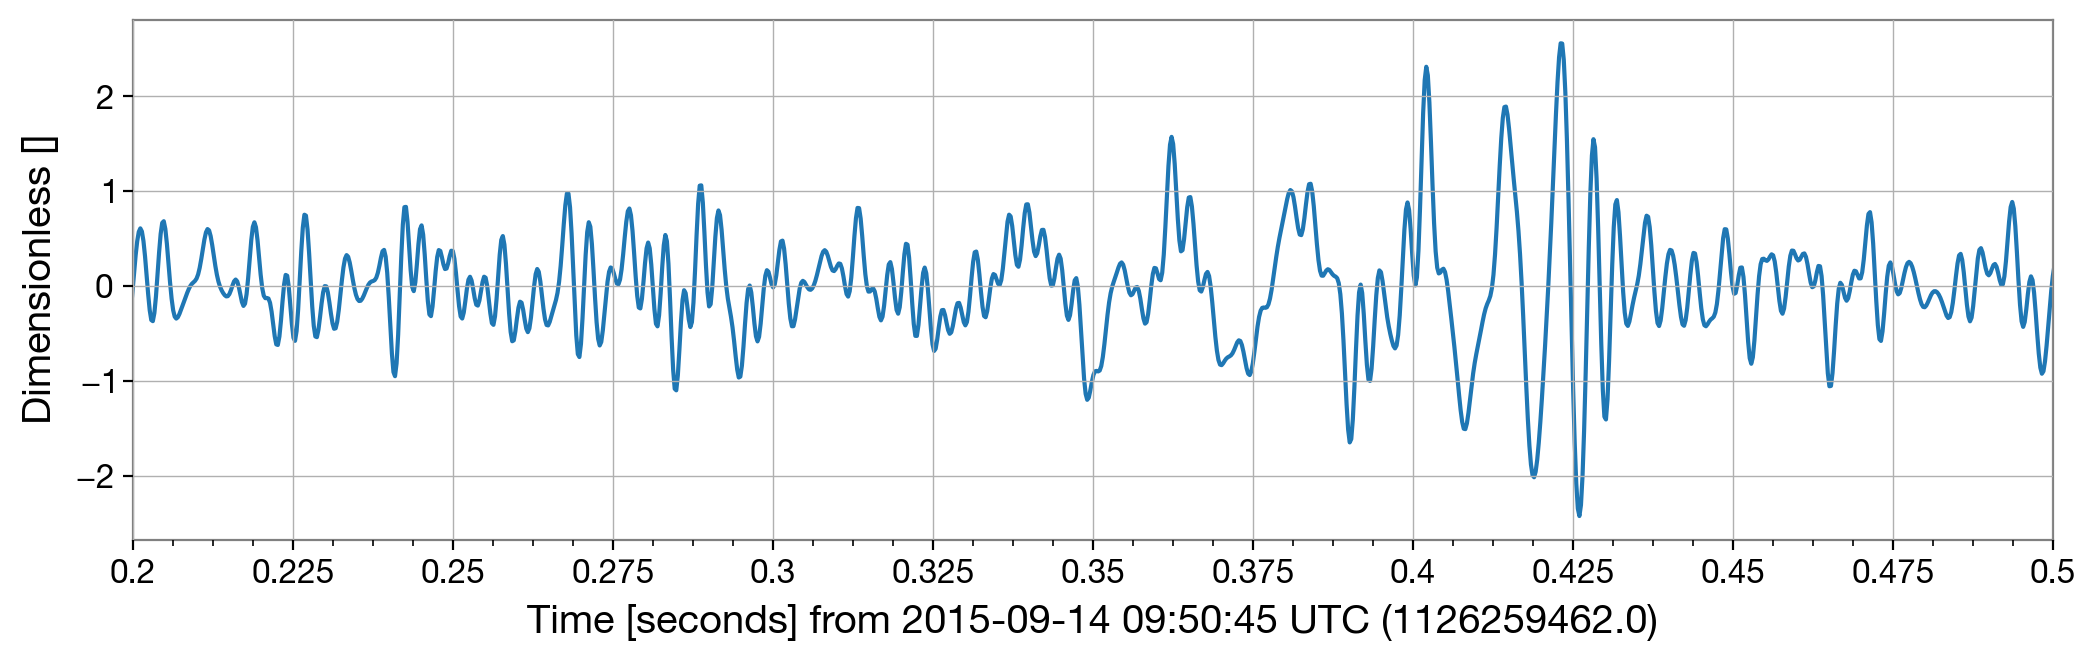

In [20]:
# -- Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig3 = bp_data.plot()
plt.xlim(t0-0.2, t0+0.1)

### Plot a q-transform of the data

A Q-transform plot shows how a signal’s frequency changes with time.

* The x-axis shows time
* The y-axis shows frequency
* The color scale shows the amount of “energy” or “signal power” in each time-frequency pixel.

A parameter called “Q” refers to the quality factor. A higher quality factor corresponds to a larger number of cycles in each time-frequency pixel.

* [Q-transform in gwpy](https://gwpy.github.io/docs/latest/examples/timeseries/qscan/)
* [Q-transform in Wikipedia](https://en.wikipedia.org/wiki/Constant-Q_transform)

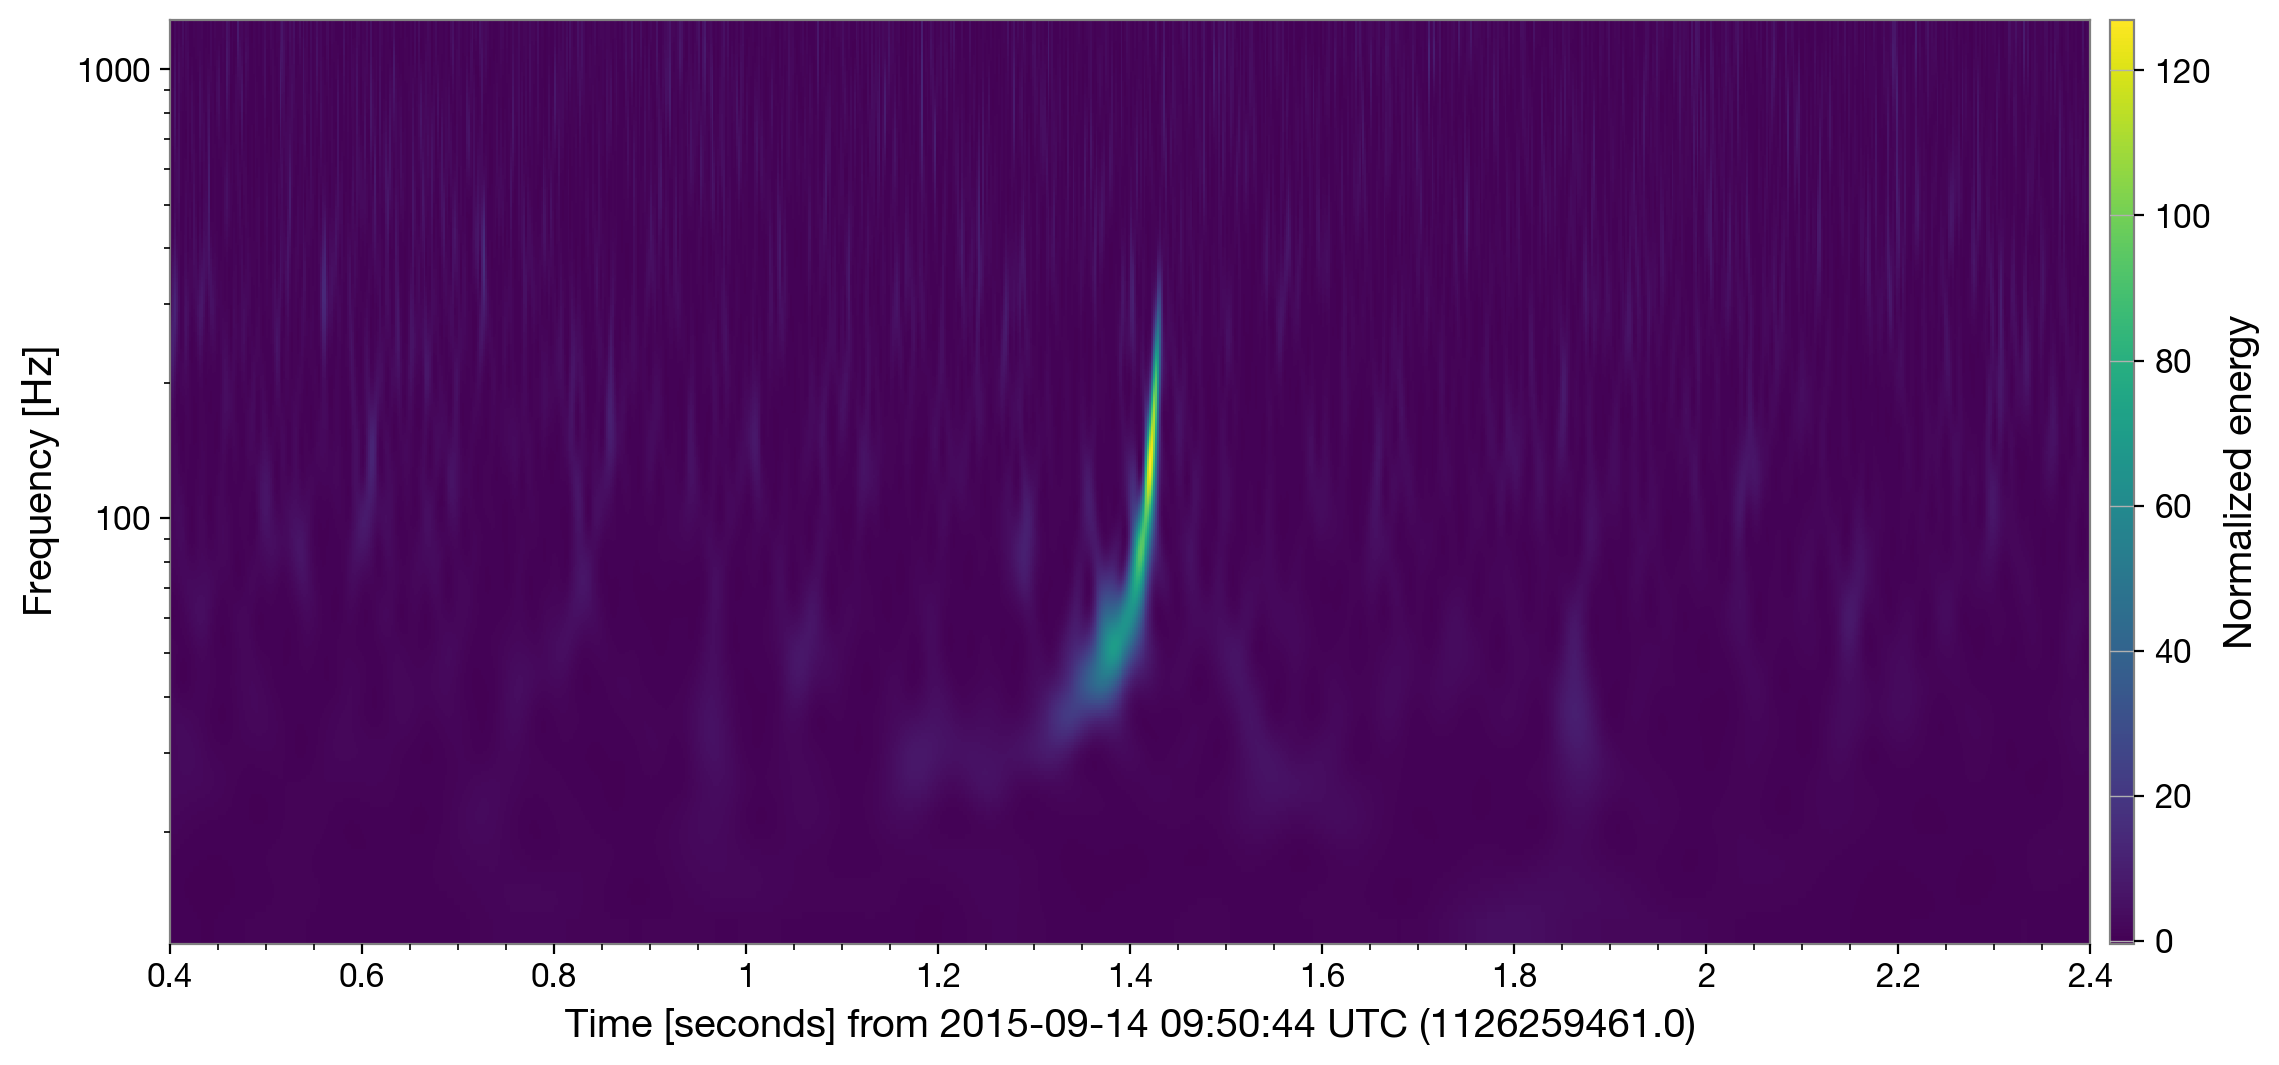

In [21]:
dt = 1  #-- Set width of q-transform plot, in seconds
hq = strain.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
ax.grid(False)
ax.set_yscale('log')
try: fig4.colorbar(label="Normalized energy")
except: pass